### 생선의 무게와 크기로 생선 분류
- 데이터셋: fish.cvs
- feature/input_data: Weight, Length
- target/class/output: Species
- ML method: 지도학습 --> 분류
- classifilter algorithm: 미정

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 경로: 상대경로, 절대경로
#   - 상대경로: 현재 파일을 기준으로 경로 설정
#       - ./: 현재 위치 의미
#       - ../: 상위 즉, 한 단계 위의 위치를 의미
#   - 절대경로: 드라이브(C, D, E, ...)를 기준으로 경로를 설정

DATA_FILE = '../data/fish.csv'

In [3]:
# 첫번째 줄: 컬럼명 존재
# 구분자: ,
# selec column: Species, Weight, Length or 0, 1, 2

fish_df = pd.read_csv(DATA_FILE, usecols=['Species', 'Weight', 'Length'])

In [4]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [5]:
fish_df.value_counts()  # 컬럼별 고유값

Species    Weight  Length
Roach      160.0   22.5      2
Perch      120.0   22.0      2
Bream      600.0   32.0      2
           700.0   33.0      2
           242.0   25.4      1
                            ..
Perch      100.0   18.0      1
           110.0   21.0      1
                   22.0      1
           115.0   21.0      1
Whitefish  1000.0  40.0      1
Name: count, Length: 155, dtype: int64

In [6]:
# 중복값
# 어떻게 처리 할 것인가?
# 길이와 무게가 같다고 해서 높이, 너비, 대각선 길이가 같이 않음
# feature를 전부 들고 온것이 아니기 때문에 중복은 유지

In [8]:
# 이상치
# 제거할 수 있을까? 의미가 없을 듯함

- feature와 target의 관계, feature와 feature의 관계

In [9]:
# 상관계수를 확인: 어는 정도로 관련이 있는가?
fish_df.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.918618
Length,0.918618,1.000000


In [20]:
# object type의 Species를 int형을 번환한 컬럼을 추가
# 컬럼명: Species_Code
fish_df['Species'].unique()
# names = fish['Species'].unique().tolist()  # numpy 소스
# {name:idx for idx, name in enumerate(names)}  # dict comprehension
mapping = {'Bream':0, 'Roach':1, 'Whitefish':2, 'Parkki':3, 'Perch':4, 'Pike':5, 'Smelt':6}
fish_df['Species_Code'] = fish_df['Species'].map(mapping)

In [21]:
fish_df['Species_Code'].isna().sum()

0

In [22]:
fish_df = fish_df.astype({'Species_Code':'int64'})

In [23]:
fish_df.head(10)

,Species,Weight,Length,Species_Code
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0
5,Bream,450.0,29.7,0
6,Bream,500.0,29.7,0
7,Bream,390.0,30.0,0
8,Bream,450.0,30.0,0
9,Bream,500.0,30.7,0


In [24]:
# 모든 종류에 대한 상관계수
fish_df.corr(numeric_only=True)

,Weight,Length,Species_Code
Weight,1.000000,0.918618,-0.176783
Length,0.918618,1.000000,-0.118425
Species_Code,-0.176783,-0.118425,1.000000


In [25]:
# 도미(Bream)와 빙어(Smelt)에 대한 상관계수
mask = (fish_df['Species'] == 'Bream') | (fish_df['Species'] == 'Smelt')
two_fish_df = fish_df[mask]
two_fish_df.corr(numeric_only=True)

,Weight,Length,Species_Code
Weight,1.000000,0.960347,-0.843828
Length,0.960347,1.000000,-0.944132
Species_Code,-0.843828,-0.944132,1.000000


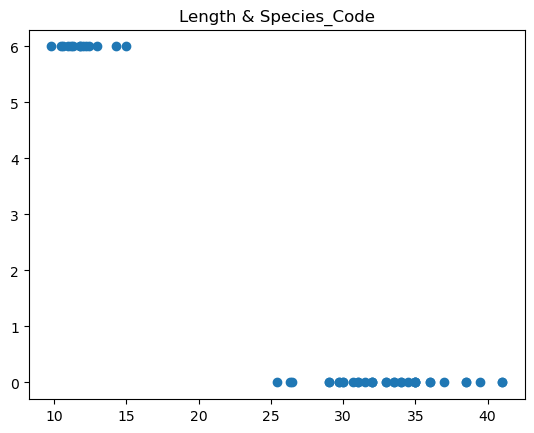

In [26]:
# 산점도 그려서 확인하기
plt.scatter(two_fish_df['Length'], two_fish_df['Species_Code'])
plt.title('Length & Species_Code')
plt.show()

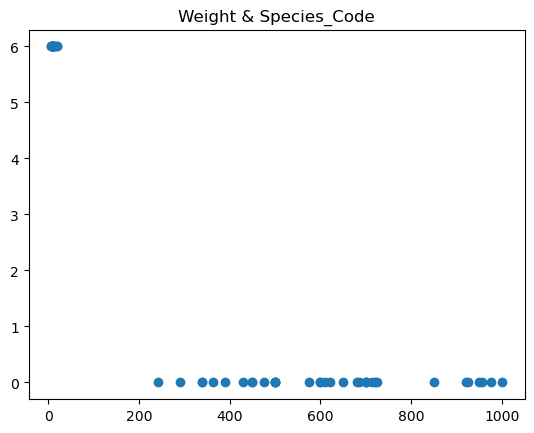

In [29]:
plt.scatter(two_fish_df['Weight'], two_fish_df['Species_Code'])
plt.title('Weight & Species_Code')
plt.show()

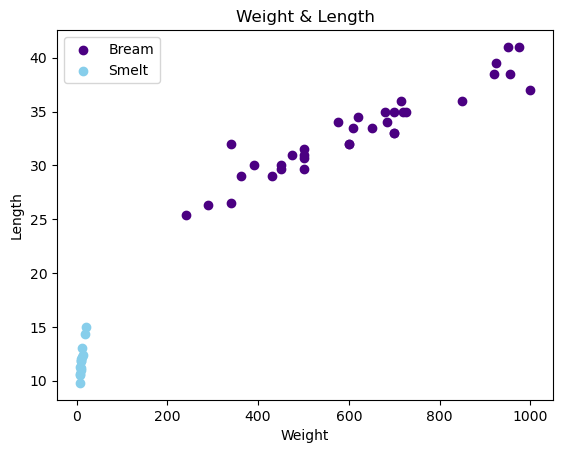

In [37]:
# 물고기 종류에 따라 색을 다르게
plt.scatter(two_fish_df.loc[:34,'Weight'], two_fish_df.loc[:34,'Length'], c='indigo', label='Bream')
plt.scatter(two_fish_df.loc[145:,'Weight'], two_fish_df.loc[145:,'Length'], c='skyblue', label='Smelt')

plt.title('Weight & Length')
plt.ylabel('Length')
plt.xlabel('Weight')
plt.legend()
plt.show()

- ML에 대해서 사용할 것임
- 라이브러리: scikit-learn을 사용할 것임
- 지도학습: 분류
- 학습 알고리즘: KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier  # 모듈로딩

In [39]:
# 학습 인스턴스 생성 --> 믈래스명(매개변수 값)
model = KNeighborsClassifier()

In [41]:
print(model, model.n_neighbors)
# n_neighbors: defult K 값은 5, 보통 1, 3, 5를 많이 사용하고 그중에서 5를 가장 많이 사용함.
# 보통 작은 K를 사용하는데 이는 시간 복잡도 때문도 있음. K값이 크면 클수록 계산해야하는 거리값도 커지기 때문에

KNeighborsClassifier() 5


In [43]:
# model.fit
feature = two_fish_df[['Weight', 'Length']]
target = two_fish_df['Species_Code']

print(f"feature.shape: {target.shape}, {feature.ndim}D")
print(f"target.shape: {target.shape}, {target.ndim}D")

feature.shape: (49,), 2D
target.shape: (49,), 1D


In [52]:
model.n_neighbors = 5
model.fit(feature, target)

KNeighborsClassifier()

In [48]:
# Model Parameter: 학습 후 설정되는 속성
#   - parameter name 뒤에 _가 붙음 ex) XXX_

print(model.classes_)

[0 6]


In [50]:
model.n_neighbors = 3
model.fit(feature, target)

KNeighborsClassifier(n_neighbors=3)

In [51]:
print(model.classes_)

[0 6]


In [53]:
# 검증
# - KNN은 모델 즉 규칙 및 패턴 생성 X
# - 검증 데이터가 입력이 되면 학습 데이터와 거리 측정
# - 지정된 k 개수 만큼 검증 데이터와 가까운 데이터를 도출
# - 분류일 경우 k 개수 데이터가 가진 label/target/class에 따라 다수결로 결정

In [64]:
two_fish_df = two_fish_df.reset_index().drop('index', axis=1)
two_fish_df

,Species,Weight,Length,Species_Code
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0
5,Bream,450.0,29.7,0
6,Bream,500.0,29.7,0
7,Bream,390.0,30.0,0
8,Bream,450.0,30.0,0
9,Bream,500.0,30.7,0


In [69]:
data = two_fish_df.loc[33:37, ['Weight', 'Length']]
target = two_fish_df.loc[33:37, 'Species_Code']

In [71]:
prediction = model.predict(data)
print(f"prediction: {prediction}, target: {target.to_list()}")

prediction: [0 0 6 6 6], target: [0, 0, 6, 6, 6]


In [72]:
# 정확도? 정밀도? 계산을 대신해주는 메서드: score
model.score(data, target)       # 1.0이라... 성능 별로네... 데이터가 적어서 그런가? 7종류 생선을 전부 사용했으면 조금은 달랐을까?

1.0